<a href="https://colab.research.google.com/github/Goro-python/my_NLP/blob/next_dev/Semantic_similarity_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# semantic similarity

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
np.random.seed(3)


In [78]:
!curl -LO https://raw.githubusercontent.com/MohamadMerchant/SNLI/master/data.tar.gz
!tar -xvzf data.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.1M  100 11.1M    0     0  17.9M      0 --:--:-- --:--:-- --:--:-- 17.9M
SNLI_Corpus/
SNLI_Corpus/snli_1.0_dev.csv
SNLI_Corpus/snli_1.0_train.csv
SNLI_Corpus/snli_1.0_test.csv


In [109]:
df = pd.read_csv("SNLI_Corpus/snli_1.0_train.csv")
df = df[df['similarity']!= '-']
df = df.sample(n = 100000)
df = df.astype('str')

In [110]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
# text cleaning and processing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

def tokenizer(docs):
  stop_words = set(stopwords.words('english')) 
  ps =  PorterStemmer() 
  text = []
  for sent in docs:
      text.append(word_tokenize(sent))
  res = []
  #print('Text: ',text)
  for words in text:
    new_word = []
    for word in words:
      if word not in stop_words and word.isalpha():
        #print(word)
        stem_word = ps.stem(word)
        #print('after stemming:',stem_word)
        new_word.append(stem_word)
    #print(' '.join(new_word))
    res.append(' '.join(new_word))  
  return res

text1 = tokenizer(df['sentence1'])
text2 = tokenizer(df['sentence2'])
  


  

In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cvr = TfidfVectorizer(max_features=2000)
temp = cvr.fit_transform(text1+text2).toarray()

In [7]:
X1 = cvr.transform(text1).toarray()
X2 = cvr.transform(text2).toarray()

In [8]:
# target values 

X = np.concatenate((X1,X2),axis = -1)

In [9]:
X.shape

(10000, 4000)

In [10]:
#train and test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [11]:
# random forest trial 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200,verbose = True)
print('training error : ',rfc.fit(x_train,y_train))
print('validation error: ',rfc.score(x_test,y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


training error :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)
validation error:  0.548


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   56.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [12]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
mnm = MultinomialNB().fit(x_train,y_train)
print('training error : ',mnm.fit(x_train,y_train))
print('validation error: ',mnm.score(x_test,y_test))


training error :  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
validation error:  0.514


In [13]:
X.shape

(10000, 4000)

In [14]:
X.shape

(10000, 4000)

In [15]:
# keras tensorflow 

import tensorflow as tf
import keras


In [16]:
inp =   tf.keras.Input(shape= (X.shape[1],))
output = tf.keras.layers.Dense(3,activation='softmax')(inp)
similar_sent =  keras.Model(inputs = inp,outputs = output)

In [17]:
similar_sent.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4000)]            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 12003     
Total params: 12,003
Trainable params: 12,003
Non-trainable params: 0
_________________________________________________________________


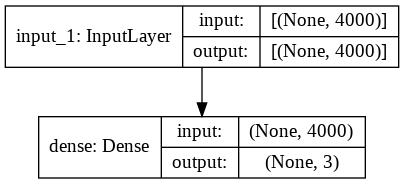

In [18]:
keras.utils.plot_model(similar_sent,show_shapes= True)

In [19]:
similar_sent.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [20]:
X2.shape

(10000, 2000)

In [21]:
history = similar_sent.fit(x_train,y_train,epochs=100,batch_size=64,validation_data = (x_test,y_test),callbacks=[callback])

Epoch 1/100
141/141 [==============================] - 1s 5ms/step - loss: 1.0948 - accuracy: 0.3793 - val_loss: 1.0820 - val_accuracy: 0.4920
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.5982 - val_loss: 1.0680 - val_accuracy: 0.5040
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 1.0430 - accuracy: 0.6377 - val_loss: 1.0559 - val_accuracy: 0.5070
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0194 - accuracy: 0.6696 - val_loss: 1.0445 - val_accuracy: 0.4930
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9984 - accuracy: 0.6742 - val_loss: 1.0347 - val_accuracy: 0.5030
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9797 - accuracy: 0.6744 - val_loss: 1.0256 - val_accuracy: 0.4980
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.9607 - accuracy: 0.6834 - val_loss: 1.0180 - val_accuracy: 0.4990

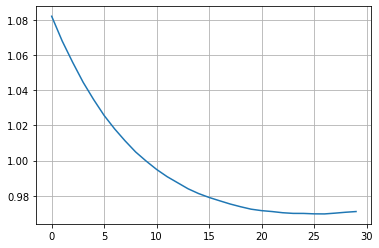

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])

plt.grid()

In [23]:
y_pred =  similar_sent.predict(x_test)

y_pred = np.argmax(y_pred,axis = -1)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       318
           1       0.54      0.55      0.55       338
           2       0.52      0.48      0.50       344

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [112]:
#text1 
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(text1)
sequences1 = tokenizer1.texts_to_sequences(text1)
sent1 = pad_sequences(sequences1, maxlen=100,padding='post')
print('first sentence :',sent1.shape)
# text1 dict

word_index1 = tokenizer1.word_index
print(word_index1)
_dict_dim1 = len(word_index1) + 1
print('sentence1 dict dim : ',_dict_dim1)




first sentence : (100000, 100)
{'a': 1, 'man': 2, 'woman': 3, 'two': 4, 'wear': 5, 'peopl': 6, 'shirt': 7, 'stand': 8, 'sit': 9, 'white': 10, 'young': 11, 'black': 12, 'blue': 13, 'play': 14, 'girl': 15, 'boy': 16, 'walk': 17, 'dog': 18, 'red': 19, 'hold': 20, 'look': 21, 'men': 22, 'front': 23, 'street': 24, 'group': 25, 'one': 26, 'dress': 27, 'water': 28, 'the': 29, 'three': 30, 'green': 31, 'hat': 32, 'child': 33, 'women': 34, 'ride': 35, 'run': 36, 'yellow': 37, 'larg': 38, 'an': 39, 'jump': 40, 'littl': 41, 'outsid': 42, 'brown': 43, 'person': 44, 'children': 45, 'build': 46, 'hand': 47, 'next': 48, 'jacket': 49, 'small': 50, 'watch': 51, 'ball': 52, 'anoth': 53, 'work': 54, 'crowd': 55, 'background': 56, 'around': 57, 'behind': 58, 'player': 59, 'orang': 60, 'near': 61, 'tabl': 62, 'bike': 63, 'smile': 64, 'top': 65, 'short': 66, 'field': 67, 'pink': 68, 'beach': 69, 'sidewalk': 70, 'talk': 71, 'park': 72, 'tree': 73, 'grass': 74, 'take': 75, 'pictur': 76, 'camera': 77, 'perform

In [113]:
# text2 
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(text2)
sequences2 = tokenizer2.texts_to_sequences(text2)
sent2 = pad_sequences(sequences2, maxlen=100,padding='post')
print('second sentence :',sent2.shape)

# text2 dict

word_index2 = tokenizer2.word_index
print(word_index2)
_dict_dim2 = len(word_index2) + 1
print('sentence2 dict dim : ',_dict_dim2)



second sentence : (100000, 100)
{'a': 1, 'the': 2, 'man': 3, 'peopl': 4, 'woman': 5, 'two': 6, 'play': 7, 'girl': 8, 'dog': 9, 'boy': 10, 'men': 11, 'sit': 12, 'there': 13, 'outsid': 14, 'wear': 15, 'person': 16, 'walk': 17, 'stand': 18, 'group': 19, 'women': 20, 'child': 21, 'young': 22, 'ride': 23, 'look': 24, 'run': 25, 'children': 26, 'hold': 27, 'watch': 28, 'work': 29, 'three': 30, 'street': 31, 'kid': 32, 'eat': 33, 'water': 34, 'shirt': 35, 'bike': 36, 'sleep': 37, 'take': 38, 'black': 39, 'get': 40, 'an': 41, 'jump': 42, 'outdoor': 43, 'car': 44, 'park': 45, 'near': 46, 'dress': 47, 'white': 48, 'perform': 49, 'red': 50, 'beach': 51, 'wait': 52, 'game': 53, 'ladi': 54, 'player': 55, 'blue': 56, 'coupl': 57, 'front': 58, 'pictur': 59, 'build': 60, 'some': 61, 'one': 62, 'go': 63, 'ball': 64, 'talk': 65, 'crowd': 66, 'littl': 67, 'swim': 68, 'guy': 69, 'friend': 70, 'old': 71, 'insid': 72, 'togeth': 73, 'danc': 74, 'make': 75, 'race': 76, 'worker': 77, 'tri': 78, 'someon': 79, '

In [114]:
# target 
lbl = LabelEncoder()
Y = lbl.fit_transform(df['similarity'])

In [115]:
Y.shape

(100000,)

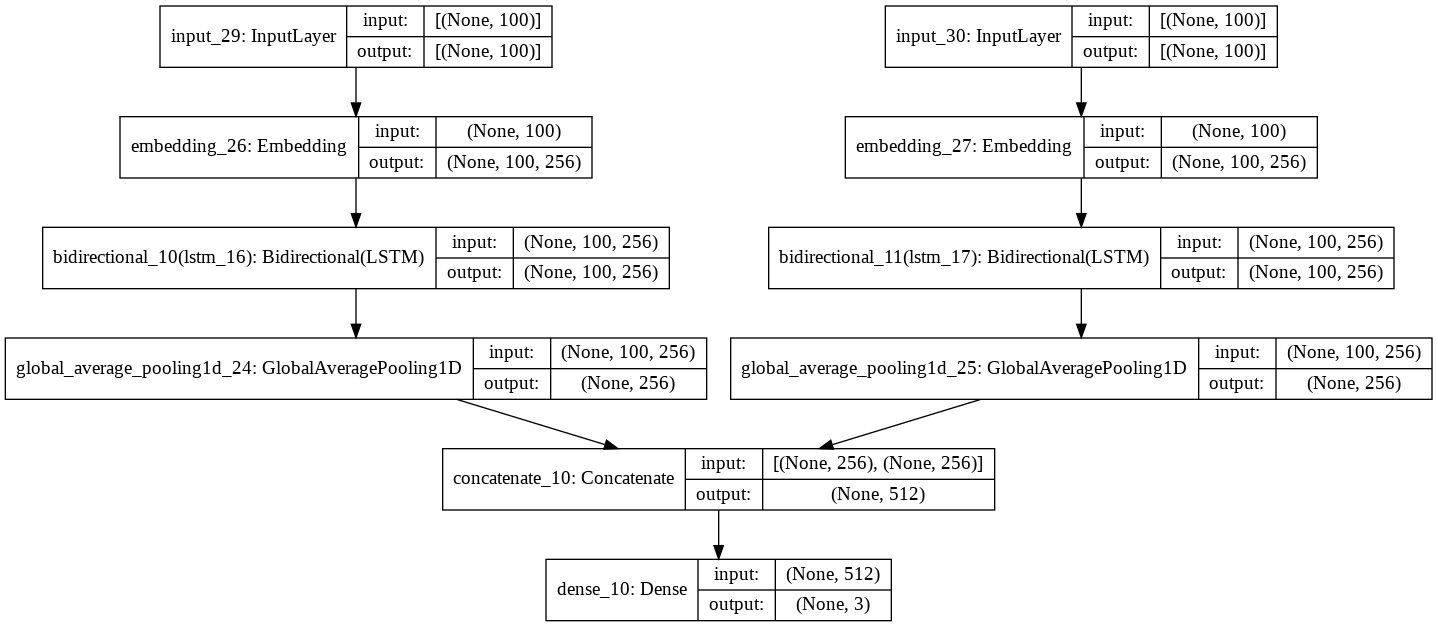

In [116]:
import tensorflow as tf
import keras
maxlen = 100
# getting the embedding 
# first sentence 
inp1 =  tf.keras.Input(shape = (maxlen,))
embed1 = tf.keras.layers.Embedding(input_dim = _dict_dim1,output_dim=256)(inp1)
lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 128,return_sequences=True))(embed1)
pooled1 = tf.keras.layers.GlobalAveragePooling1D()(lstm1)
# second sentence 
inp2 =    tf.keras.Input(shape = (maxlen,))
embed2 =  tf.keras.layers.Embedding(input_dim = _dict_dim2,output_dim=256)(inp2)
lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 128,return_sequences=True))(embed2)
pooled2 = tf.keras.layers.GlobalAveragePooling1D()(lstm2)
# concatenate 
concat = tf.keras.layers.concatenate([pooled1,pooled2],axis = -1)
# dense 
output = tf.keras.layers.Dense(3,activation='softmax')(concat)

sent_model_v2 = keras.Model(inputs = [inp1,inp2],outputs = output)

keras.utils.plot_model(sent_model_v2,show_shapes=True)




In [117]:
sent_model_v2.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = sent_model_v2.fit([sent1,sent2],Y,epochs=3,batch_size=32,validation_split=0.1)

Epoch 1/3
1305/2813 [============>.................] - ETA: 1:37 - loss: 0.6772 - accuracy: 0.7114

(30000,)

In [25]:
res

NameError: ignored

In [ ]:
# word to vec